### UE 4268-EVALUATION SOMATIVE

### UE4268_EXAMEN 2023

### SOUVALBE ADELPHE BEBDANG 

### matricule:21S2761

email:adelphe.souvalbe@facsciences-uy1.cm

Department of Physics - Faculty of Science - University of Yaoundé I

### LABORATOIRE DE PHYSIQUE ATOMIQUE MOLECULAIRE ET BIOPHYSIQUE


### Lundi,19 juin 2023

In [1]:
from IPython.display import Image

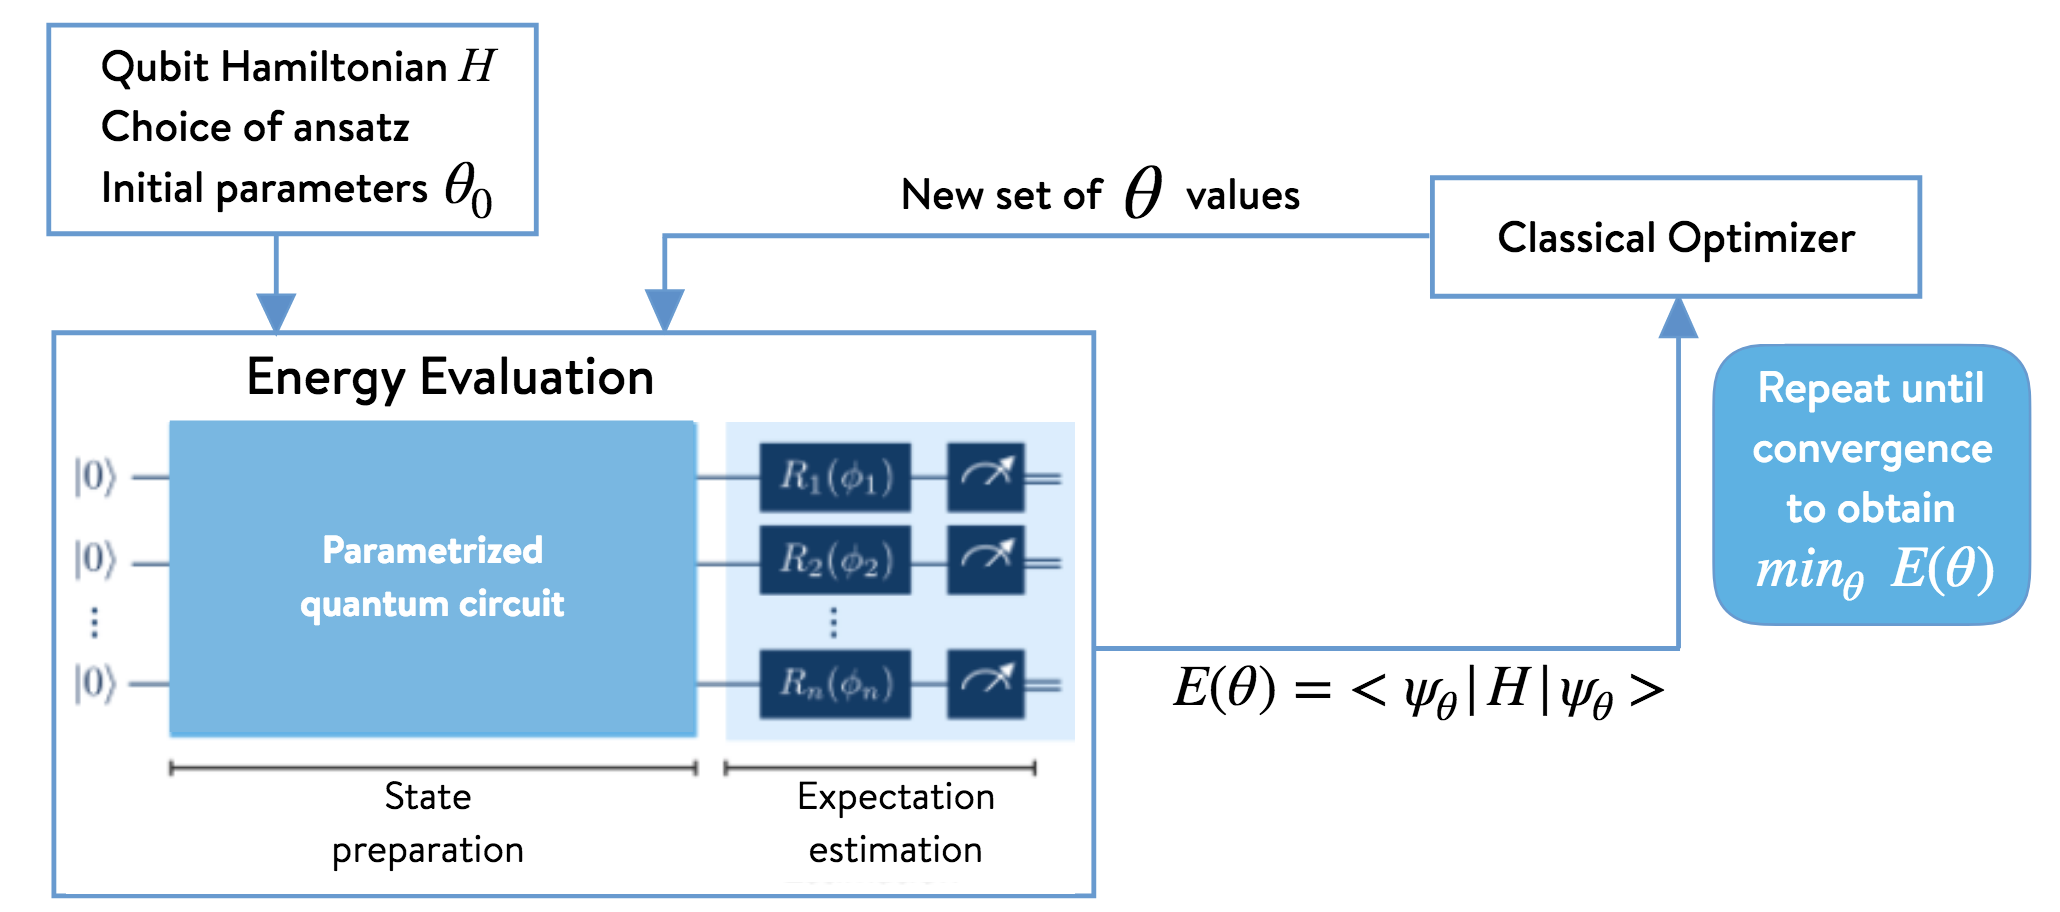

In [2]:
Image("./VQE_Diagram.png", width=600)

### Support Vector Regression to predict polarity of molecules

Écrivons un script python qui utilise un modèle de régression de vecteur de support (SVR) pour prédire la TPSA (aire de surface polaire topologique, une propriété physico-chimique décrivant la polarité des molécules) à partir des molécules du jeu de données ZING contenu dans le fichier '.Zn10.txt'. L'entrée - caractéristique structurelle des molécules est l'empreinte digitale de Morgan et la sortie est TPSA.

Nous rappelons que l'empreinte moléculaire représente les sous-structures d'une molécule (array) comme un vecteur de nombres binaires. Il s'agit d'un descripteur de structure moléculaire à utiliser comme entrée pour révéler la relation entre la structure moléculaire et les propriétés, appelées relations quantitatives structure-activité (QSAR).

In [4]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

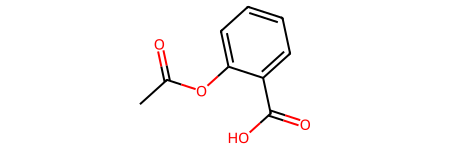

In [6]:
#permet de ressortir la molecule
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

In [15]:
print(f'The number of heavy atoms (non-hydrogen atoms) in the molecule is {m.GetNumHeavyAtoms()}')

The number of heavy atoms (non-hydrogen atoms) in the molecule is 13


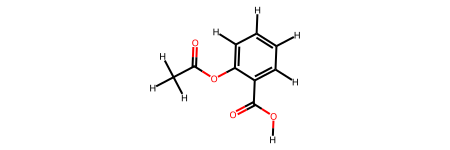

In [17]:
m1 = AllChem.AddHs(m)
m1

In [16]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) 
# the number 2 denotes the number of iterations in Morgan algorithm.

fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fps.append(fp)

fps = np.asarray(fps) # Convert our encoded molecule to an array
fps.shape


(1, 1024)

In [28]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/Zn10.txt')

In [29]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
smile

['NC(=O)C1CCCCC1C(F)(F)F',
 'CCCCCNC(=O)N1CCCC1CO',
 'CCC(CC)c1cc(C[NH3+])on1',
 'C[NH2+]C1CCC(c2ccccc2Cl)C1',
 'COc1ccc2c(c1)C(C(C)[NH3+])CN2C',
 'CC1C[NH2+]CCN1CCCc1ccco1',
 'Cc1ccc(S(=O)(=O)C2CC[NH2+]C2)cc1C',
 'COc1cc(C(N)C(F)(F)F)ccc1C(=O)[O-]',
 'Nc1cc(C2CCC[NH2+]2)ccc1O',
 'CN(C)S(=O)(=O)N1CC2CC1C(=O)O2',
 'CC(O)CC[NH2+]C(C)(C)C',
 'C=CC(C)OC(C)CC(=O)[O-]',
 'N#Cc1ccc2cc(C#N)ccc2c1',
 'Cc1ccc(O)c(C2(C)CCCO2)c1',
 'Cc1ccc(C)c2c1CC[NH2+]C2CC(O)C(=O)[O-]',
 'c1cc(C2NCCc3ccc4c(c32)OCO4)co1',
 '[NH3+]CCCn1c(CCO)nc2cccnc21',
 'CC([NH3+])C1CCCc2c1nc(C(F)(F)F)n2C',
 'CC(C)n1c(C2CCC[NH2+]C2)[nH+]c2c1CCCC2',
 'Cc1cc([O-])c2nnc(CC([NH3+])C(=O)[O-])n2n1',
 'C[NH+](C)CC(CC[NH3+])c1ccc(Cl)cc1',
 'CCc1ccc(-c2cnnc([O-])c2C#N)cc1',
 'Cc1cc(C(N)=[NH2+])c(C2CC2)o1',
 'CCCCN(C)c1nccc(C(=O)[O-])n1',
 'CC(C)(C[NH3+])C(=O)Nc1cccc(Cl)c1',
 'CC(=CC(=O)NCC1CC1)c1ccccc1',
 'CCNC(=O)N(CC)C(C)c1ccc(C#N)cc1',
 'CNC(=O)c1cc(O)c2ccc(OC)cc2c1',
 'CCC(CO)Nc1nc(C)c(C)c(Cl)n1',
 'Cc1ccsc1-c1c[nH]cc1C[NH3+]',
 'Cc1

In [30]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

Smiles
0             NC(=O)C1CCCCC1C(F)(F)F
1               CCCCCNC(=O)N1CCCC1CO
2            CCC(CC)c1cc(C[NH3+])on1
3         C[NH2+]C1CCC(c2ccccc2Cl)C1
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...                              ...
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997         CCCC[NH2+]C1CCc2ccccc21
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C
5999        CCC(C)NC(=O)NCCC(=O)[O-]

[6000 rows x 1 columns]

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd89e70>  
1     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd89e00>  
2     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd8a810>  
3     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd8ace0>  
4     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd8b3e0>  
...                                                ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20900>  
5996  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20970>  
5997  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb209e0>  
5998  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20a50>  
5999  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20ac0>  

[6000 rows x 2 columns]
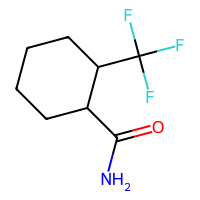
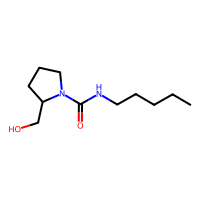
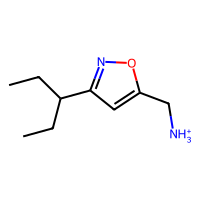
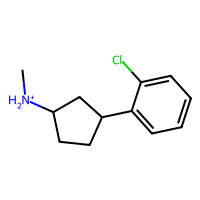
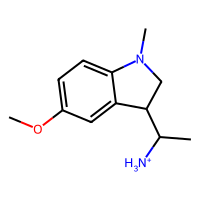
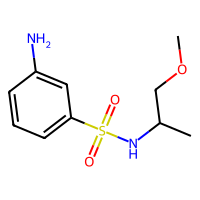
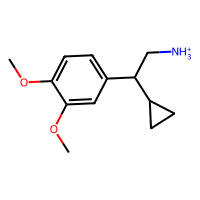
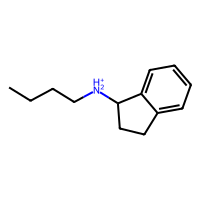
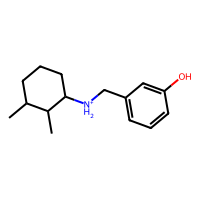
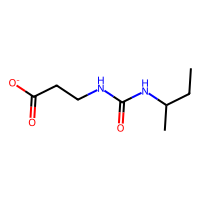

In [31]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

In [32]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [33]:
molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

In [34]:
descriptors_df = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df, descriptors_df], axis=1)
data

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules       MW    LogP  HBD  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd89e70>  195.184  1.8404    1   
1     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd89e00>  214.309  1.3429    2   
2     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd8a810>  169.248  1.3201    1   
3     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd8ace0>  210.728  2.1693    1   
4     <rdkit.Chem.rdchem.Mol object at 0x7f8c1cd8b3e0>  207.297  0.8590    1   
...                                                ...      ...     ...  ...   
5995  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20900>  244.316  0.5820    2   
5996  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20970>  222.308  1.4393    1   
5997  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb209e0>  190.310  2.0374    1   
5998  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20a50>  234.363  2.2803    2   
5999  <rdkit.Chem.rdchem.Mol object at 0x7f8c1bb20ac0>  187.219 -0.7759    2   

      HBA    PSA  Aromatic Rings  Rotatable Bonds       QED  
0       1  43.09               0                1  0.681153  
1       2  52.57               0                5  0.678579  
2       2  53.67               1                4  0.738657  
3       0  16.61               1                2  0.770859  
4       2  40.11               1                2  0.781030  
...   ...    ...             ...              ...       ...  
5995    4  81.42               1                5  0.742397  
5996    2  46.10               1                5  0.819062  
5997    0  16.61               1                4  0.699701  
5998    1  36.84               1                3  0.826891  
5999    3  81.26               0                5  0.592315  

[6000 rows x 10 columns]

In [35]:
data.isnull().sum()

Smiles             0
Molecules          0
MW                 0
LogP               0
HBD                0
HBA                0
PSA                0
Aromatic Rings     0
Rotatable Bonds    0
QED                0
dtype: int64

In [36]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)

In [37]:
# Convert the fingerprint as an array 
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [38]:
fps.shape

(6000, 1024)

In [39]:
logp = data.iloc[:,3].values

In [40]:
logp.shape[0] == fps.shape[0]

True

In [41]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

In [42]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print(f'The r2_score is {r2} and the mean square error is {mse}')

The r2_score is 0.8907400875892015 and the mean square error is 0.19215635860664254


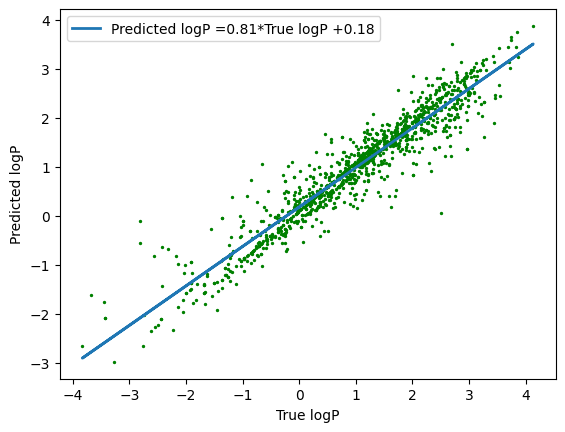

In [44]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()

### Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)



Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

In [90]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

H2_driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

H2_problem = H2_driver.run()
H2_hamiltonian = H2_problem.hamiltonian
H2_fermionic_op = H2_hamiltonian.second_q_op()

In [89]:
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.operators import FermionicOp

In [91]:
H2_qubit_JW_op = JordanWignerMapper().map(H2_fermionic_op)

print("Number of items in the JWT Pauli list:", len(H2_qubit_JW_op))
print(H2_qubit_JW_op)

Number of items in the JWT Pauli list: 15
-0.8105479805373275 * IIII
+ 0.17218393261915532 * IIIZ
- 0.2257534922240238 * IIZI
+ 0.17218393261915538 * IZII
- 0.22575349222402374 * ZIII
+ 0.1209126326177663 * IIZZ
+ 0.16892753870087907 * IZIZ
+ 0.04523279994605785 * YYYY
+ 0.04523279994605785 * XXYY
+ 0.04523279994605785 * YYXX
+ 0.04523279994605785 * XXXX
+ 0.16614543256382416 * ZIIZ
+ 0.16614543256382416 * IZZI
+ 0.17464343068300436 * ZIZI
+ 0.1209126326177663 * ZZII


In [92]:
H2_qubit_BK_op = BravyiKitaevMapper().map(H2_fermionic_op)

print("Number of items in the BKT Pauli list:", len(H2_qubit_BK_op))
print(H2_qubit_BK_op)

Number of items in the BKT Pauli list: 15
-0.8105479805373275 * IIII
+ 0.17218393261915532 * IIIZ
- 0.2257534922240238 * IIZZ
+ 0.17218393261915538 * IZII
- 0.22575349222402374 * ZZZI
+ 0.1209126326177663 * IIZI
+ 0.16892753870087907 * IZIZ
+ 0.04523279994605785 * ZXIX
- 0.04523279994605785 * IXZX
- 0.04523279994605785 * ZXZX
+ 0.04523279994605785 * IXIX
+ 0.16614543256382416 * ZZZZ
+ 0.16614543256382416 * IZZZ
+ 0.17464343068300436 * ZZIZ
+ 0.1209126326177663 * ZIZI


# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

In [46]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from math import pi
backend = BasicAer.get_backend('unitary_simulator')
import matplotlib.pyplot as plt
from qiskit.quantum_info.operators import Operator, Pauli

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [50]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
theta= Parameter('𝜃')
import numpy as np
parameter_0 = Parameter('theta[0]')

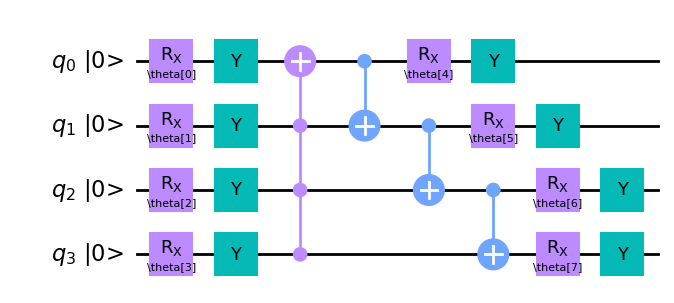

In [74]:
parameter_0 = Parameter('theta[0]')
parameter_1 = Parameter('\\theta[1]')
parameter_2 = Parameter('\\theta[2]')
parameter_3 = Parameter('\\theta[3]')
parameter_4 = Parameter('\\theta[4]')
parameter_5 = Parameter('\\theta[5]')
parameter_6 = Parameter('\\theta[6]')

parameter_0 = Parameter('\\theta[0]')
parameter_7 = Parameter('\\theta[7]')
qc = QuantumCircuit(4)
qc.rx(parameter_0, qubit = 0)
qc.rx(parameter_1, qubit = 1)
qc.rx(parameter_2, qubit = 2)
qc.rx(parameter_3, qubit = 3)
qc.y(0)
qc.y(1)
qc.y(2)
qc.y(3)
qc.mcx([3,2,1],0)

qc.cx(0,1)
qc.rx(parameter_4, qubit = 0)
qc.cx(1,2)
qc.cx(2,3)
qc.y(0)
qc.rx(parameter_5, qubit = 1)
qc.y(1)
qc.rx(parameter_6, qubit = 2)
qc.y(2)
qc.rx(parameter_7, qubit = 3)
qc.y(3)

qc.draw('mpl',initial_state=True)

In [75]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [76]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [77]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP


In [78]:
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

def ansatz(mapper):
    """Ansatz function

    Args:
        mapper : the output of the function qubit_mapper(mapper)

    Returns: The anstatz
    """    
    
    ansatz = UCCSD(
        H2_problem.num_spatial_orbitals,
        H2_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            H2_problem.num_spatial_orbitals,
            H2_problem.num_particles,
            mapper,
        ),
    )
    return ansatz

In [79]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np

def vqe_solver(mapper, optimizer):
    """ Setup VQE solver

    Args:
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver
    """    
    vqe_solver = VQE(estimator, ansatz(mapper), optimizer)

    vqe_solver.initial_point = np.zeros(ansatz(mapper).num_parameters)
    return vqe_solver

In [80]:
def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            mapp = v   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:        
                opt = m
        GS_solver = vqe_solver(mapp, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(mapp, GS_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver


In [81]:
from pyscf import gto, scf, mcscf
import numpy as np
from pyscf.mcscf import avas #AVAS method to construct mcscf active space
#active-space-size, #-active-electrons, orbital-initial-guess-for-CASCI/CASSCF

from qiskit_nature_pyscf import QiskitSolver

In [83]:
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.primitives import Estimator

estimator = Estimator()

In [84]:
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")

/home/souvalbe/anaconda3/lib/python3.10/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


Running VQE and PM mapper
With SLSQP optimizer and UCCSD ansatz
Elapsed time: 0:00:01.433182 

-1.1372213770151602


In [85]:
def algorithm(mapper, optimizer, norb, nelec):
    
    ansatz = UCCSD(
    norb,
    nelec,
    mapper,
    initial_state=HartreeFock(
        norb,
        nelec,
        mapper,
    ),
    )

    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
    
    return algorithm

In [86]:
#  Initialisation de la structure moléculaire
H2_mol = gto.M(atom="H 0 0 0; H 0 0 .735", basis="sto-3g")

In [87]:
# Calculs HF 
H2_h_f = scf.RHF(H2_mol).run()

# Calculs post-HF
# norb = H2_h_f.mo_coeff.shape[1]
# nelec = H2_mol.nelec
# nel = nelec[0] + nelec[1]
norb, nel, mo = avas.avas(H2_h_f,['H 1s', 'H 1s'])
nelec = (int(nel/2), int(nel/2))
H2_cas = mcscf.CASCI(H2_h_f, norb, nel)

# Intégration de l'algorithme quantique
mapper = ParityMapper()
optimizer = SLSQP()
H2_cas.fcisolver = QiskitSolver(algorithm(mapper, optimizer, norb, nelec))

H2_cas.run(mo)

converged SCF energy = -1.116998996754
CASCI E = -1.13730603569577  E(CI) = -1.85727503014475
